In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mvc.csv", low_memory=False)
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2017,9:35,NaN,NaN,40.609985,-73.962390,"(40.609985, -73.96239)",AVENUE P,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3748283,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,09/09/2017,2:11,BRONX,10469,40.860410,-73.855950,"(40.86041, -73.85595)",LACONIA AVENUE,STELL PLACE,NaN,...,Unspecified,Unspecified,NaN,NaN,3746139,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
2,09/04/2017,5:15,NaN,NaN,40.824432,-73.873604,"(40.824432, -73.873604)",MORRISON AVENUE,BRUCKNER BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3747132,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,08/25/2017,15:17,QUEENS,11433,40.698452,-73.781880,"(40.698452, -73.78188)",173 STREET,109 AVENUE,NaN,...,Unspecified,Unspecified,Unspecified,NaN,3737267,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN
4,09/15/2017,17:15,BROOKLYN,11220,40.637123,-74.030550,"(40.637123, -74.03055)",NaN,NaN,138 BAY RIDGE AVENUE,...,NaN,NaN,NaN,NaN,3751102,Sedan,NaN,NaN,NaN,NaN
5,09/04/2017,14:45,NaN,NaN,40.680542,-73.961685,"(40.680542, -73.961685)",ATLANTIC AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3742846,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
6,09/13/2017,9:45,NaN,NaN,40.668410,-73.750570,"(40.66841, -73.75057)",225 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3750802,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
7,09/10/2017,19:30,NaN,NaN,40.601430,-74.005140,"(40.60143, -74.00514)",CROPSEY AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3747266,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
8,09/05/2017,17:47,BROOKLYN,11229,40.599632,-73.933960,"(40.599632, -73.93396)",AVENUE V,KNAPP STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3744141,Sedan,Sedan,NaN,NaN,NaN
9,09/06/2017,11:13,NaN,NaN,40.707825,-74.004330,"(40.707825, -74.00433)",PEARL STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3744711,Taxi,Bus,NaN,NaN,NaN


In [3]:
factors=df[["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5","NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED"]]
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Unspecified")&((factors["CONTRIBUTING FACTOR VEHICLE 2"]!="Unspecified")&(factors["CONTRIBUTING FACTOR VEHICLE 2"].notna()))]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED


In [4]:
factors=factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]!="Unspecified")]
factors

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
1,Fell Asleep,Unspecified,Unspecified,NaN,NaN,0.0,0.0
2,Following Too Closely,Unspecified,NaN,NaN,NaN,0.0,0.0
3,Illnes,Unspecified,Unspecified,Unspecified,NaN,1.0,0.0
7,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,0.0,0.0
8,Other Vehicular,Driver Inattention/Distraction,NaN,NaN,NaN,0.0,0.0
10,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,1.0,0.0
13,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
14,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
15,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0


In [5]:
factors=factors.loc[factors["CONTRIBUTING FACTOR VEHICLE 1"].notna()].reset_index(drop=True)
factors

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
1,Fell Asleep,Unspecified,Unspecified,NaN,NaN,0.0,0.0
2,Following Too Closely,Unspecified,NaN,NaN,NaN,0.0,0.0
3,Illnes,Unspecified,Unspecified,Unspecified,NaN,1.0,0.0
4,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,0.0,0.0
5,Other Vehicular,Driver Inattention/Distraction,NaN,NaN,NaN,0.0,0.0
6,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,1.0,0.0
7,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
8,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
9,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0


In [6]:
factors.head(100)

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
1,Fell Asleep,Unspecified,Unspecified,NaN,NaN,0.0,0.0
2,Following Too Closely,Unspecified,NaN,NaN,NaN,0.0,0.0
3,Illnes,Unspecified,Unspecified,Unspecified,NaN,1.0,0.0
4,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,0.0,0.0
5,Other Vehicular,Driver Inattention/Distraction,NaN,NaN,NaN,0.0,0.0
6,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,1.0,0.0
7,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0
8,Backing Unsafely,Unspecified,NaN,NaN,NaN,0.0,0.0
9,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,0.0,0.0


In [7]:
arr=["Unspecified","Other Vehicular","1","80"]
factors=factors.replace(arr,np.NaN)

In [8]:
factors.loc[factors["CONTRIBUTING FACTOR VEHICLE 1"]=="80"]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED


In [9]:
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Illness")|(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Illnes")]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
3,Illnes,NaN,NaN,NaN,NaN,1.0,0.0
78,Illnes,NaN,NaN,NaN,NaN,1.0,0.0
156,Illnes,NaN,NaN,NaN,NaN,1.0,0.0
349,Illnes,NaN,NaN,NaN,NaN,0.0,0.0
915,Illnes,NaN,NaN,NaN,NaN,1.0,0.0
945,Illnes,NaN,NaN,NaN,NaN,1.0,0.0
1360,Illnes,NaN,NaN,NaN,NaN,1.0,0.0
2041,Illnes,NaN,NaN,NaN,NaN,1.0,0.0
2212,Illnes,NaN,NaN,NaN,NaN,1.0,0.0
3557,Illnes,NaN,NaN,NaN,NaN,1.0,0.0


In [10]:
factors=factors.replace("Illnes","Illness")

In [11]:
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Drugs (illegal)")|(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Drugs (Illegal)")]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
139,Drugs (illegal),NaN,NaN,NaN,NaN,0.0,0.0
2096,Drugs (illegal),NaN,NaN,NaN,NaN,0.0,0.0
3980,Drugs (illegal),NaN,NaN,NaN,NaN,0.0,0.0
6527,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
6663,Drugs (illegal),NaN,NaN,NaN,NaN,2.0,0.0
8087,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
9129,Drugs (illegal),NaN,NaN,NaN,NaN,0.0,0.0
10066,Drugs (illegal),NaN,NaN,NaN,NaN,2.0,0.0
10872,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0
10963,Drugs (illegal),NaN,NaN,NaN,NaN,1.0,0.0


In [12]:
factors=factors.replace("Drugs (illegal)","Drugs (Illegal)")

In [13]:
factors.loc[(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Cell Phone (hand-Held)")|(factors["CONTRIBUTING FACTOR VEHICLE 1"]=="Cell Phone (hand-held)")]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
3290,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,1.0,0.0
4269,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
7258,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
7944,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
8221,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
13825,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
15334,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,1.0,0.0
27675,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,2.0,0.0
28189,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,0.0,0.0
32575,Cell Phone (hand-Held),NaN,NaN,NaN,NaN,3.0,0.0


In [14]:
factors=factors.replace("Cell Phone (hand-Held)","Cell Phone (hand-held)")

In [15]:
factors=factors.replace("Reaction to Other Uninvolved Vehicle","Reaction to Uninvolved Vehicle")

In [16]:
factors=factors.rename(columns={"CONTRIBUTING FACTOR VEHICLE 1":"F1","CONTRIBUTING FACTOR VEHICLE 2":"F2","CONTRIBUTING FACTOR VEHICLE 3":"F3","CONTRIBUTING FACTOR VEHICLE 4":"F4","CONTRIBUTING FACTOR VEHICLE 5":"F5"})
factors

,F1,F2,F3,F4,F5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Backing Unsafely,NaN,NaN,NaN,NaN,0.0,0.0
1,Fell Asleep,NaN,NaN,NaN,NaN,0.0,0.0
2,Following Too Closely,NaN,NaN,NaN,NaN,0.0,0.0
3,Illness,NaN,NaN,NaN,NaN,1.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,0.0,0.0
5,NaN,Driver Inattention/Distraction,NaN,NaN,NaN,0.0,0.0
6,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,1.0,0.0
7,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
8,Backing Unsafely,NaN,NaN,NaN,NaN,0.0,0.0
9,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0


In [17]:
factors=factors.loc[(factors["F1"].notna())|(factors["F2"].notna())|(factors["F3"].notna())|(factors["F4"].notna())|(factors["F5"].notna())].reset_index(drop=True)
factors

,F1,F2,F3,F4,F5,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Backing Unsafely,NaN,NaN,NaN,NaN,0.0,0.0
1,Fell Asleep,NaN,NaN,NaN,NaN,0.0,0.0
2,Following Too Closely,NaN,NaN,NaN,NaN,0.0,0.0
3,Illness,NaN,NaN,NaN,NaN,1.0,0.0
4,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,0.0,0.0
5,NaN,Driver Inattention/Distraction,NaN,NaN,NaN,0.0,0.0
6,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,1.0,0.0
7,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0
8,Backing Unsafely,NaN,NaN,NaN,NaN,0.0,0.0
9,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,0.0,0.0


In [18]:
f1=factors.groupby(["F1"])
f1_injured_sum=f1["NUMBER OF PERSONS INJURED"].sum()
f2=factors.groupby(["F2"])
f2_injured_sum=f2["NUMBER OF PERSONS INJURED"].sum()
f3=factors.groupby(["F3"])
f3_injured_sum=f3["NUMBER OF PERSONS INJURED"].sum()
f4=factors.groupby(["F4"])
f4_injured_sum=f4["NUMBER OF PERSONS INJURED"].sum()
f5=factors.groupby(["F5"])
f5_injured_sum=f5["NUMBER OF PERSONS INJURED"].sum()
f1_injured_sum

F1
Accelerator Defective                                      390.0
Aggressive Driving/Road Rage                              2915.0
Alcohol Involvement                                       7969.0
Animals Action                                             256.0
Backing Unsafely                                          6857.0
Brakes Defective                                          2681.0
Cell Phone (hand-held)                                     211.0
Cell Phone (hands-free)                                     75.0
Driver Inattention/Distraction                           93943.0
Driver Inexperience                                       6678.0
Driverless/Runaway Vehicle                                 173.0
Drugs (Illegal)                                            642.0
Eating or Drinking                                          32.0
Failure to Keep Right                                      907.0
Failure to Yield Right-of-Way                            43922.0
Fatigued/Drowsy       

In [19]:
f1_killed_sum=f1["NUMBER OF PERSONS KILLED"].sum()
f2_killed_sum=f2["NUMBER OF PERSONS KILLED"].sum()
f3_killed_sum=f3["NUMBER OF PERSONS KILLED"].sum()
f4_killed_sum=f4["NUMBER OF PERSONS KILLED"].sum()
f5_killed_sum=f5["NUMBER OF PERSONS KILLED"].sum()
f1_killed_sum

F1
Accelerator Defective                                      0.0
Aggressive Driving/Road Rage                              10.0
Alcohol Involvement                                       72.0
Animals Action                                             0.0
Backing Unsafely                                          37.0
Brakes Defective                                           0.0
Cell Phone (hand-held)                                     0.0
Cell Phone (hands-free)                                    0.0
Driver Inattention/Distraction                           251.0
Driver Inexperience                                       34.0
Driverless/Runaway Vehicle                                 3.0
Drugs (Illegal)                                            9.0
Eating or Drinking                                         0.0
Failure to Keep Right                                      6.0
Failure to Yield Right-of-Way                            194.0
Fatigued/Drowsy                                     

In [20]:
f1_count=f1["NUMBER OF PERSONS KILLED"].count()
f2_count=f2["NUMBER OF PERSONS KILLED"].count()
f3_count=f3["NUMBER OF PERSONS KILLED"].count()
f4_count=f4["NUMBER OF PERSONS KILLED"].count()
f5_count=f5["NUMBER OF PERSONS KILLED"].count()
f1_count

F1
Accelerator Defective                                       856
Aggressive Driving/Road Rage                               7042
Alcohol Involvement                                       16924
Animals Action                                             1285
Backing Unsafely                                          66198
Brakes Defective                                           5598
Cell Phone (hand-held)                                      456
Cell Phone (hands-free)                                     257
Driver Inattention/Distraction                           331896
Driver Inexperience                                       25759
Driverless/Runaway Vehicle                                  917
Drugs (Illegal)                                            1005
Eating or Drinking                                           96
Failure to Keep Right                                      2923
Failure to Yield Right-of-Way                             99830
Fatigued/Drowsy                      

In [21]:
filler=factors["F1"].unique()
filler = filler[~pd.isnull(filler)]
filler = pd.Series(np.zeros(len(filler)),filler)
filler

Backing Unsafely                                         0.0
Fell Asleep                                              0.0
Following Too Closely                                    0.0
Illness                                                  0.0
Failure to Yield Right-of-Way                            0.0
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion    0.0
Driver Inattention/Distraction                           0.0
Passing Too Closely                                      0.0
Turning Improperly                                       0.0
Passing or Lane Usage Improper                           0.0
Driver Inexperience                                      0.0
Other Electronic Device                                  0.0
Traffic Control Disregarded                              0.0
Pavement Slippery                                        0.0
Reaction to Uninvolved Vehicle                           0.0
Unsafe Lane Changing                                     0.0
Aggressive Driving/Road 

In [22]:
f2_injured_sum=filler.combine(f2_injured_sum,max, fill_value=0.0)
f3_injured_sum=filler.combine(f3_injured_sum,max, fill_value=0.0)
f4_injured_sum=filler.combine(f4_injured_sum,max, fill_value=0.0)
f5_injured_sum=filler.combine(f5_injured_sum,max, fill_value=0.0)
f2_killed_sum=filler.combine(f2_killed_sum,max, fill_value=0.0)
f3_killed_sum=filler.combine(f3_killed_sum,max, fill_value=0.0)
f4_killed_sum=filler.combine(f4_killed_sum,max, fill_value=0.0)
f5_killed_sum=filler.combine(f5_killed_sum,max, fill_value=0.0)
f2_count=filler.combine(f2_count,max, fill_value=0.0)
f3_count=filler.combine(f3_count,max, fill_value=0.0)
f4_count=filler.combine(f4_count,max, fill_value=0.0)
f5_count=filler.combine(f5_count,max, fill_value=0.0)
f5_injured_sum

Accelerator Defective                                      0.0
Aggressive Driving/Road Rage                               0.0
Alcohol Involvement                                       18.0
Animals Action                                             0.0
Backing Unsafely                                           1.0
Brakes Defective                                           2.0
Cell Phone (hand-held)                                     0.0
Cell Phone (hands-free)                                    0.0
Driver Inattention/Distraction                            69.0
Driver Inexperience                                        5.0
Driverless/Runaway Vehicle                                 0.0
Drugs (Illegal)                                            3.0
Eating or Drinking                                         0.0
Failure to Keep Right                                      1.0
Failure to Yield Right-of-Way                              6.0
Fatigued/Drowsy                                        

In [23]:
injured_sum=f1_injured_sum+f2_injured_sum+f3_injured_sum+f4_injured_sum+f5_injured_sum
injured_sum

F1
Accelerator Defective                                       424.0
Aggressive Driving/Road Rage                               3327.0
Alcohol Involvement                                        8721.0
Animals Action                                              273.0
Backing Unsafely                                           7666.0
Brakes Defective                                           2940.0
Cell Phone (hand-held)                                      242.0
Cell Phone (hands-free)                                      91.0
Driver Inattention/Distraction                           116984.0
Driver Inexperience                                        8268.0
Driverless/Runaway Vehicle                                  195.0
Drugs (Illegal)                                             712.0
Eating or Drinking                                           34.0
Failure to Keep Right                                      1120.0
Failure to Yield Right-of-Way                             49002.0
Fatigue

In [24]:
killed_sum=f1_killed_sum+f2_killed_sum+f3_killed_sum+f4_killed_sum+f5_killed_sum
killed_sum

F1
Accelerator Defective                                      0.0
Aggressive Driving/Road Rage                              11.0
Alcohol Involvement                                       78.0
Animals Action                                             0.0
Backing Unsafely                                          41.0
Brakes Defective                                           0.0
Cell Phone (hand-held)                                     0.0
Cell Phone (hands-free)                                    0.0
Driver Inattention/Distraction                           287.0
Driver Inexperience                                       39.0
Driverless/Runaway Vehicle                                 3.0
Drugs (Illegal)                                            9.0
Eating or Drinking                                         0.0
Failure to Keep Right                                      7.0
Failure to Yield Right-of-Way                            201.0
Fatigued/Drowsy                                     

In [25]:
count_sum=f1_count+f2_count+f3_count+f4_count+f5_count
count_sum

F1
Accelerator Defective                                       926.0
Aggressive Driving/Road Rage                               8453.0
Alcohol Involvement                                       18349.0
Animals Action                                             1359.0
Backing Unsafely                                          73638.0
Brakes Defective                                           5989.0
Cell Phone (hand-held)                                      528.0
Cell Phone (hands-free)                                     304.0
Driver Inattention/Distraction                           413575.0
Driver Inexperience                                       31692.0
Driverless/Runaway Vehicle                                  999.0
Drugs (Illegal)                                            1166.0
Eating or Drinking                                          104.0
Failure to Keep Right                                      3572.0
Failure to Yield Right-of-Way                            114839.0
Fatigue

In [26]:
injured_per_occurance=injured_sum/count_sum
injured_per_occurance.sort_values(axis=0, ascending=False, inplace=True)
injured_per_occurance

F1
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion    0.748896
Unsafe Speed                                             0.650225
Traffic Control Disregarded                              0.639237
Physical Disability                                      0.611524
Drugs (Illegal)                                          0.610635
Listening/Using Headphones                               0.583333
Traffic Control Device Improper/Non-Working              0.568320
Passenger Distraction                                    0.519869
Tinted Windows                                           0.495868
Brakes Defective                                         0.490900
Other Lighting Defects                                   0.484694
Headlights Defective                                     0.480263
Alcohol Involvement                                      0.475285
Glare                                                    0.472664
Cell Phone (hand-held)                                   0.458333
Acceler

In [27]:
killed_per_occurance=killed_sum/count_sum
killed_per_occurance.sort_values(axis=0, ascending=False, inplace=True)
killed_per_occurance

F1
Illness                                                  0.012051
Unsafe Speed                                             0.010566
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion    0.009333
Drugs (Illegal)                                          0.007719
Traffic Control Disregarded                              0.006369
Passenger Distraction                                    0.006293
Other Lighting Defects                                   0.005102
Tow Hitch Defective                                      0.005000
Alcohol Involvement                                      0.004251
Physical Disability                                      0.003060
Driverless/Runaway Vehicle                               0.003003
Pavement Defective                                       0.002637
Failure to Keep Right                                    0.001960
Fell Asleep                                              0.001908
Failure to Yield Right-of-Way                            0.001750
Aggress

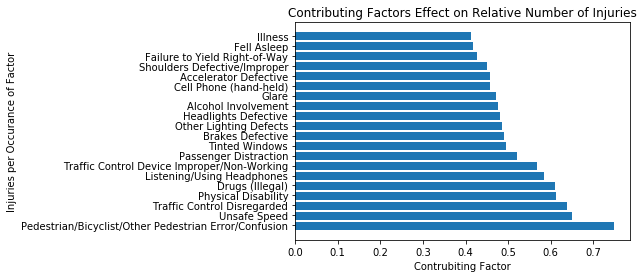

In [33]:
plt.barh(np.arange(20)-.05,injured_per_occurance.head(20))
plt.grid(b=False)
plt.yticks(np.arange(20), injured_per_occurance.head(20).index, rotation='horizontal');
plt.title('Contributing Factors Effect on Relative Number of Injuries')
plt.xlabel('Contrubiting Factor')
plt.ylabel('Injuries per Occurance of Factor');

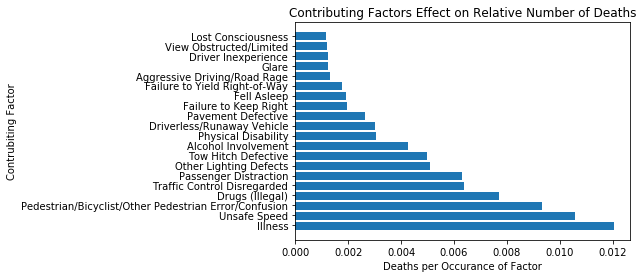

In [34]:
plt.barh(np.arange(20)-.05,killed_per_occurance.head(20))
plt.grid(b=False)
plt.yticks(np.arange(20), killed_per_occurance.head(20).index, rotation='horizontal');
plt.title('Contributing Factors Effect on Relative Number of Deaths')
plt.ylabel('Contrubiting Factor')
plt.xlabel('Deaths per Occurance of Factor');